In [1]:
import pandas as pd

from io_utils import load_data, coerce_numeric

df = coerce_numeric(load_data("../library_loans.csv"))
df = df.dropna(subset=["loan_days"]).copy()
df = df[df["loan_days"] > 0 ].copy()

df["month"] = df["checkout_date"].dt.to_period("M").dt.to_timestamp()

df["week"] = df["checkout_date"].dt.to_period("W").dt.start_time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   loan_id           130 non-null    object        
 1   checkout_date     130 non-null    datetime64[ns]
 2   branch            130 non-null    object        
 3   genre             130 non-null    object        
 4   item_type         130 non-null    object        
 5   patron_age_group  130 non-null    object        
 6   loan_days         130 non-null    int64         
 7   returned_date     130 non-null    datetime64[ns]
 8   overdue_days      130 non-null    int64         
 9   fine_amount       130 non-null    float64       
 10  month             130 non-null    datetime64[ns]
 11  week              130 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(5)
memory usage: 12.3+ KB


In [2]:
import metrics as M

print("Total antal lån:", M.total_loans(df))
print("Genomsnittlig lånetid (dagar):", f"{M.avg_loan_days(df):.1f}")
print("Andel övertid (%):", f"{100 * M.overdue_rate(df):.1f}%")

Total antal lån: 130
Genomsnittlig lånetid (dagar): 22.2
Andel övertid (%): 63.1%


In [3]:
by_genre = M.loans_by_genre(df)
by_branch = M.loans_by_branch(df)
by_genre, by_branch

(      genre  loans
 0   Deckare     35
 1     Roman     32
 2  Biografi     24
 3     Fakta     15
 4    Sci-Fi     14
 5  Romantik     10,
     branch  loans
 0  Centrum     45
 1   Väster     27
 2    Öster     25
 3    Söder     19
 4     Norr     14)

In [4]:
ts_month = M.loans_over_time(df, freq="M")
ts_week = M.loans_over_time(df, freq="W")
ts_month.head()

c:\Users\kaisa\OneDrive\Skrivbord\lektioner\EDA--Biblioteket\src\metrics.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(freq)["loan_id"]


,checkout_date,loans
0,2025-01-31,20
1,2025-02-28,0
2,2025-03-31,25
3,2025-04-30,0
4,2025-05-31,25


<Axes: title={'center': 'Top-10 filialer'}, xlabel='Filial', ylabel='Antal lån'>

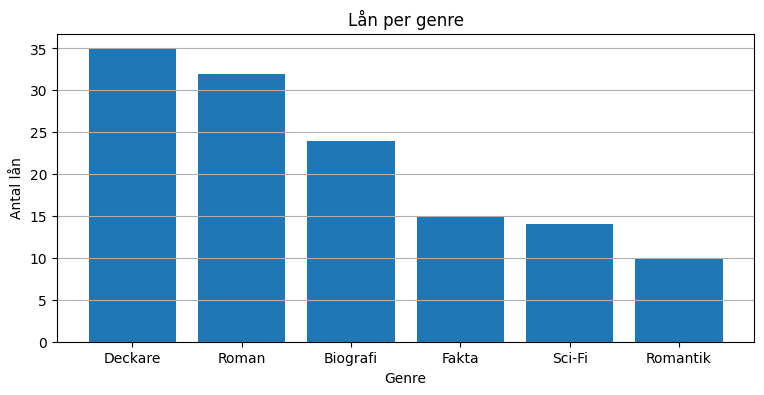

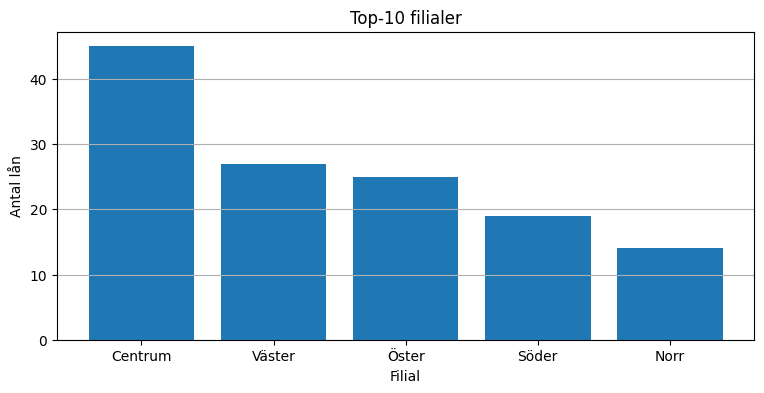

In [5]:
import matplotlib.pyplot as plt

import viz as V

# Lån per genre
fig, ax = plt.subplots(figsize = (9, 4))
V.bar(ax, by_genre["genre"], by_genre["loans"], "Lån per genre", "Genre","Antal lån")

# Top-10 filialer
fig, ax = plt.subplots(figsize=(9, 4))
top_10 = by_branch.head(10)
V.bar(ax, top_10["branch"], top_10["loans"], "Top-10 filialer", "Filial", "Antal lån")


<Axes: title={'center': 'Lån per månad'}, xlabel='Månad', ylabel='Antal lån'>

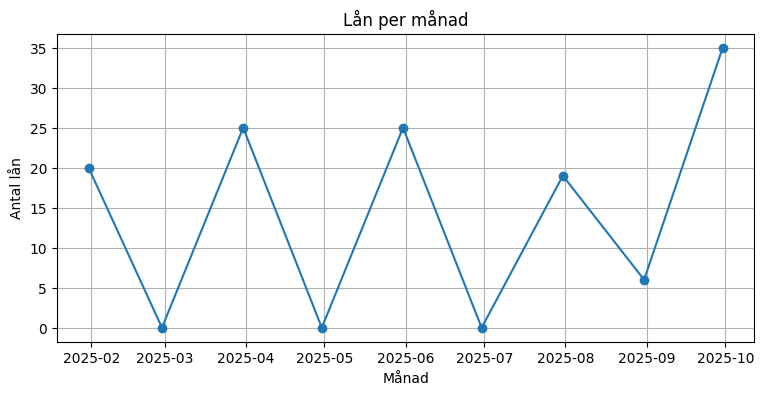

In [6]:
import matplotlib.pyplot as plt

import viz as V

# Lån per månad
fig, ax = plt.subplots(figsize=(9, 4))
V.line(ax, ts_month["checkout_date"], ts_month["loans"], "Lån per månad", "Månad", "Antal lån")

<Axes: title={'center': 'Lånetid - spridning'}, xlabel='Dagar'>

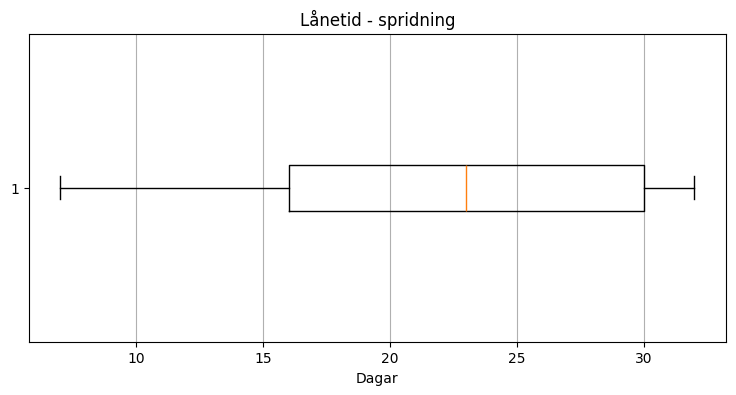

In [7]:
import matplotlib.pyplot as plt

import viz as V

# Spridning av lånetid
fig, ax = plt.subplots(figsize=(9, 4))
V.box_h(ax, df["loan_days"], "Lånetid - spridning", "Dagar")